In [1]:
import warnings
warnings.filterwarnings("ignore")

import json
import sys
import os
import pandas as pd
import logging
import logging.config
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")
from deepface import DeepFace
from contextlib import contextmanager
import sys
import os

Using TensorFlow backend.


In [2]:
@contextmanager
def suppressStream(stream):
    with open(os.devnull, "w") as devNull:
        orig = stream
        stream = devNull
        try:  
            yield
        finally:
            stream = orig

In [4]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib"]

def stopPrint(func, *args, **kwargs):
    with open(os.devnull,"w") as devNull:
        original = sys.stdout
        sys.stdout = devNull
        res = func(*args, **kwargs)
        sys.stdout = original 
    return res

for model in models[:2]:
    print(model)
    st = time.time()
    result  = stopPrint(DeepFace.verify,"11.jpg", "12.jpg", 
                              model_name = model, 
                              distance_metric = "euclidean",
                              enforce_detection =False)
    print(json.dumps(result, indent=4))
    print(f"time: {time.time() - st}")
    print("\n")

VGG-Face
Using VGG-Face model backend and euclidean distance.


{
    "verified": true,
    "distance": 0.54892594,
    "max_threshold_to_verify": 0.55,
    "model": "VGG-Face",
    "similarity_metric": "euclidean"
}
time: 3.075141429901123


Facenet
Using Facenet model backend euclidean distance.


KeyboardInterrupt: 

In [13]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib"]
for model in models:
    print(model)
    result  = DeepFace.verify("11.jpg", "21.jpg", model_name = model, enforce_detection =False)
    print(json.dumps(result, indent=4))
    print("\n")

VGG-Face
Using VGG-Face model backend and cosine distance.
{
    "verified": true,
    "distance": 0.2821853756904602,
    "max_threshold_to_verify": 0.4,
    "model": "VGG-Face",
    "similarity_metric": "cosine"
}


Facenet
Using Facenet model backend cosine distance.
{
    "verified": false,
    "distance": 0.6181509792804718,
    "max_threshold_to_verify": 0.4,
    "model": "Facenet",
    "similarity_metric": "cosine"
}


OpenFace
Using OpenFace model backend cosine distance.
{
    "verified": false,
    "distance": 0.7999250739812851,
    "max_threshold_to_verify": 0.1,
    "model": "OpenFace",
    "similarity_metric": "cosine"
}


DeepFace
Using FB DeepFace model backend cosine distance.
{
    "verified": false,
    "distance": 0.49415868520736694,
    "max_threshold_to_verify": 0.23,
    "model": "DeepFace",
    "similarity_metric": "cosine"
}


DeepID
Using DeepID2 model backend cosine distance.
{
    "verified": false,
    "distance": 0.09311425685882568,
    "max_threshold_to

opencv
ssd
dlib


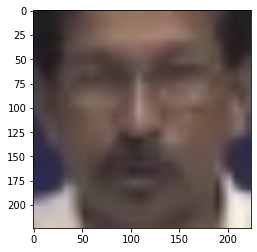

In [5]:
backends = ['opencv', 'ssd', 'dlib']

for backend in backends:
    #face detection and alignment
    print(backend)
    try:
        detected_face = DeepFace.detectFace("12.jpg", detector_backend = backend)
        plt.imshow(detected_face)
    except ValueError:
        print("no face")

In [48]:
df = DeepFace.find(img_path = "12.jpg", 
                   detector_backend = 'ssd',
                   enforce_detection = False,
                   db_path = "C:/Users/YASH/nptel_face_recognition/data/known_faces_sgdf")

Using VGG-Face model backend and cosine distance.


Analyzing:   0%|                                                                                 | 0/1 [00:00<?, ?it/s]

There are  195  representations found in  representations_vgg_face.pkl


Analyzing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]

find function lasts  6.072957992553711  seconds


In [17]:
# df.to_csv("df.csv")

In [47]:
df = pd.read_csv("df.csv").drop("Unnamed: 0",axis=1)

def foo(strn):
    temp = int(int(strn.split("/")[-1][:-4])/100)
    return temp


df['identity'] = df['identity'].apply(foo)
df.groupby('identity', as_index=False)['distance'].mean()

,identity,distance
0,0,0.139886
1,1,0.378887
2,3,0.383134
3,5,0.368248
4,8,0.351566
5,10,0.381586
6,13,0.314773
7,16,0.362377
8,18,0.366886


In [7]:
# df

,identity,distance
0,C:/Users/YASH/nptel_face_recognition/data/know...,0.130212
1,C:/Users/YASH/nptel_face_recognition/data/know...,0.133937
2,C:/Users/YASH/nptel_face_recognition/data/know...,0.157600
3,C:/Users/YASH/nptel_face_recognition/data/know...,0.166748
4,C:/Users/YASH/nptel_face_recognition/data/know...,0.180855
5,C:/Users/YASH/nptel_face_recognition/data/know...,0.183604
6,C:/Users/YASH/nptel_face_recognition/data/know...,0.186541
7,C:/Users/YASH/nptel_face_recognition/data/know...,0.242272
8,C:/Users/YASH/nptel_face_recognition/data/know...,0.256382
9,C:/Users/YASH/nptel_face_recognition/data/know...,0.261276
